In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

In [ ]:
import os
os.environ["OPENAI_API_KEY"] = (
    "sk-proj-xxxxxxxxxxxxx"
)

In [10]:
model = ChatOpenAI()

In [11]:
class BlogState(TypedDict):

    title: str
    outline: str
    content: str

In [12]:
def create_outline(state: BlogState) -> BlogState:

    # fetch title
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [13]:
def create_blog(state: BlogState) -> BlogState:

    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    state['content'] = content

    return state

In [14]:
graph = StateGraph(BlogState)

# nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

# edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()

In [15]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state)

{'title': 'Rise of AI in India', 'outline': "I. Introduction\n    A. Definition of AI\n    B. Brief overview of AI technology\n    C. Importance of AI in today's world\n\nII. History of AI in India\n    A. Early developments in AI in India\n    B. Major milestones in the evolution of AI technology in India\n    C. Adoption of AI in various industries in India\n\nIII. Current state of AI in India\n    A. Growth of AI start-ups in India\n    B. Government initiatives to promote AI in India\n    C. Major companies investing in AI technology in India\n\nIV. Impact of AI on Indian economy\n    A. Job creation through AI technology\n    B. Increased productivity and efficiency in various industries\n    C. Potential challenges and concerns related to AI adoption in India\n\nV. Future of AI in India\n    A. Trends and predictions for the future of AI technology in India\n    B. Potential areas of growth and innovation in AI in India\n    C. Role of education and research in fostering AI devel

In [16]:
print(final_state['outline'])

I. Introduction
    A. Definition of AI
    B. Brief overview of AI technology
    C. Importance of AI in today's world

II. History of AI in India
    A. Early developments in AI in India
    B. Major milestones in the evolution of AI technology in India
    C. Adoption of AI in various industries in India

III. Current state of AI in India
    A. Growth of AI start-ups in India
    B. Government initiatives to promote AI in India
    C. Major companies investing in AI technology in India

IV. Impact of AI on Indian economy
    A. Job creation through AI technology
    B. Increased productivity and efficiency in various industries
    C. Potential challenges and concerns related to AI adoption in India

V. Future of AI in India
    A. Trends and predictions for the future of AI technology in India
    B. Potential areas of growth and innovation in AI in India
    C. Role of education and research in fostering AI development in India

VI. Conclusion
    A. Recap of key points discussed

In [17]:
print(final_state['content'])


I. Introduction

A. Definition of AI
Artificial Intelligence (AI) refers to the simulation of human intelligence processes by machines, including learning, reasoning, and self-correction. AI technology enables machines to perform tasks that typically require human intelligence, such as visual perception, speech recognition, decision-making, and language translation.

B. Brief overview of AI technology
AI technology encompasses a wide range of applications, including machine learning, natural language processing, robotics, computer vision, and expert systems. These technologies are being increasingly integrated into various industries to automate processes, improve efficiency, and drive innovation.

C. Importance of AI in today's world
AI technology has become a critical component of the modern world, impacting various aspects of society, including healthcare, finance, transportation, communication, and entertainment. The ability of AI to analyze vast amounts of data, make predictions,

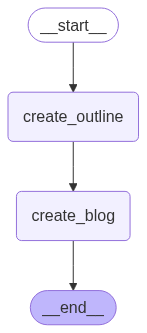

In [18]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())